<a href="https://colab.research.google.com/github/kartikrupal/deep_learning/blob/main/DL_EXP_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


937/937 ━━━━━━━━━━━━━━━━━━━━ 39s 35ms/step - accuracy: 0.8185 - loss: 0.5389 - val_accuracy: 0.9839 - val_loss: 0.0487
Epoch 2/5
  1/937 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9688 - loss: 0.0613

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


937/937 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9688 - loss: 0.0613 - val_accuracy: 0.9842 - val_loss: 0.0477
Epoch 3/5
937/937 ━━━━━━━━━━━━━━━━━━━━ 25s 23ms/step - accuracy: 0.9722 - loss: 0.0875 - val_accuracy: 0.9903 - val_loss: 0.0323
Epoch 4/5
937/937 ━━━━━━━━━━━━━━━━━━━━ 1s 748us/step - accuracy: 0.9844 - loss: 0.0755 - val_accuracy: 0.9899 - val_loss: 0.0334
Epoch 5/5
937/937 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9822 - loss: 0.0575 - val_accuracy: 0.9905 - val_loss: 0.0268
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9881 - loss: 0.0320
Test accuracy: 0.9904999732971191


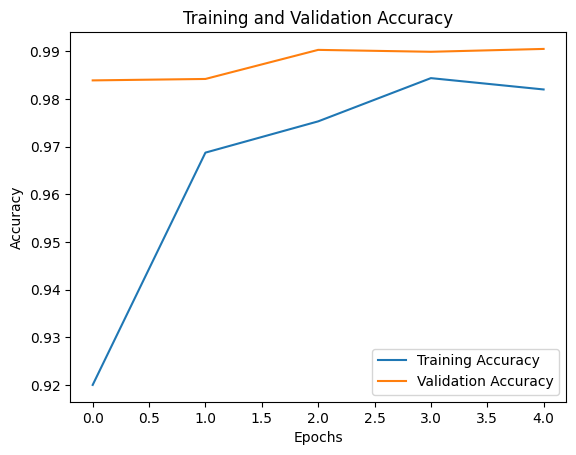

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Reshape and normalize the images
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255

# One-hot encode the labels
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

# Data Augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1
)

# Build the CNN model with padding, stride, and data augmentation
model = models.Sequential([
    layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'),

    layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'),

    layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using the augmented data generator
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),
                    epochs=5,
                    validation_data=(test_images, test_labels),
                    steps_per_epoch=len(train_images) // 64)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
